In [99]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [100]:
#Load in files
with open("optimization_inhib_avg.pkl", "rb") as fid:
    optimization = pickle.load(fid)
    
with open("objective_inhib_avg.pkl", "rb") as fid:
    objective = pickle.load(fid)
    
with open("simulation_inhib_avg.pkl", "rb") as fid:
    simulation = pickle.load(fid)

In [101]:
#Print returned optimization output
optimization

,mut_rate,cov_rate,Fitness,Convergence
0,0.136313,0.432840,-69.893223,0.0
1,0.247748,1.000000,-69.900799,0.5
2,0.400482,0.503854,-69.941547,3.5
3,0.970409,0.458389,-69.989871,8.5


In [102]:
#Create DF for objective data, adding a boolean column for successes
objectiveDF = pd.DataFrame.from_records(objective, columns=['Mutation Rate','Crossover Rate','Fitness','Convergence'])
objectiveDF['Convergence'] = objectiveDF['Convergence'].astype(int)
objectiveDF['success'] = objectiveDF['Fitness'] < -69.98987
objectiveDF

,mut_rate,cov_rate,Fitness,Convergence,success
0,0.136313,0.432840,-69.893223,0,False
1,0.192636,0.275923,-69.941547,8,False
2,0.018915,0.235981,-69.893223,0,False
3,0.046580,0.111788,-69.893223,0,False
4,0.508255,0.528446,-69.893223,0,False
...,...,...,...,...,...
280,0.385104,0.178544,-69.941547,12,False
281,0.356404,0.122990,-69.893223,0,False
282,0.157355,0.668232,-69.941547,9,False
283,0.646475,0.548999,-69.989871,15,True


In [103]:
# Create dataframes based on success
successes = objectiveDF[objectiveDF['Fitness'] < -69.98987]
failures = objectiveDF[objectiveDF['Fitness'] > -69.98987]

In [104]:
# Calculate averages for successful simulations
print("Average mutation rate for success:",successes['mut_rate'].mean())
print("Average crossover rate for success:",successes['cov_rate'].mean())
print("Average convergence rate for success:",successes['Convergence'].mean())

Average mutation rate for success: 0.7311816618319189
Average crossover rate for success: 0.42656466532417314
Average convergence rate for success: 15.273809523809524


In [105]:
# Look at averages by convergence
successes.groupby('Convergence').mean()

,mut_rate,cov_rate,Fitness,success
Convergence,,,,
8,0.970409,0.458389,-69.989871,1.0
9,0.981577,0.478975,-69.989871,1.0
10,0.478910,0.213948,-69.989871,1.0
11,0.622745,0.445224,-69.989871,1.0
12,0.823936,0.464707,-69.989871,1.0
13,0.738845,0.422750,-69.989871,1.0
14,0.756384,0.374294,-69.989871,1.0
15,0.699100,0.389424,-69.989871,1.0
16,0.783622,0.506011,-69.989871,1.0


[Text(0.5, 1.0, 'Convergence vs. Fitness for All Simulations')]

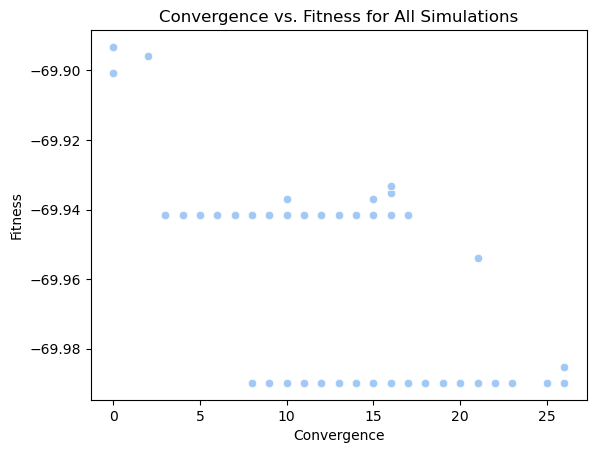

In [106]:
# Build a scatter plot of convergence vs. fitness
sns.scatterplot(x='Convergence', y='Fitness', data= objectiveDF).set(title='Convergence vs. Fitness for All Simulations')

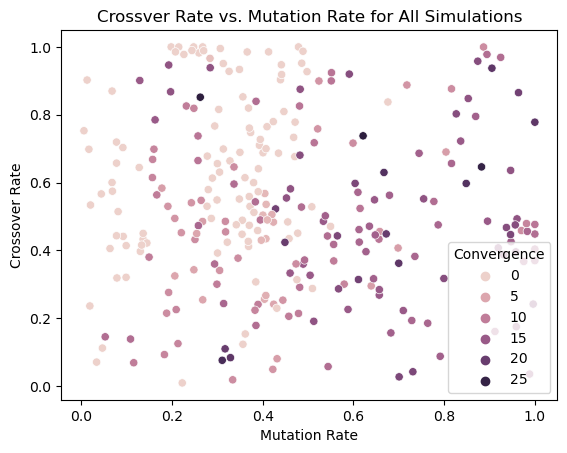

In [107]:
# Loot at convergence by mutation and crossover rate
sns.set_palette("pastel")
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF,
                hue = 'Convergence').set(title='Crossver Rate vs. Mutation Rate for All Simulations')
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.savefig('Convergence_inhib_avg')

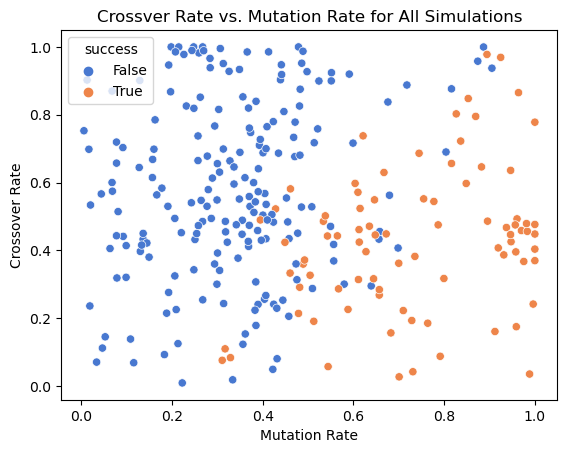

In [108]:
# Loot at success by mutation and crossover rate
colors = ["Orange","Blue"]
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF, 
                hue = 'success', palette = "muted").set(title='Crossver Rate vs. Mutation Rate for All Simulations')
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.savefig('Success_inhib_avg')

## Build plots to explore successful simulations

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Successful Simulations')]

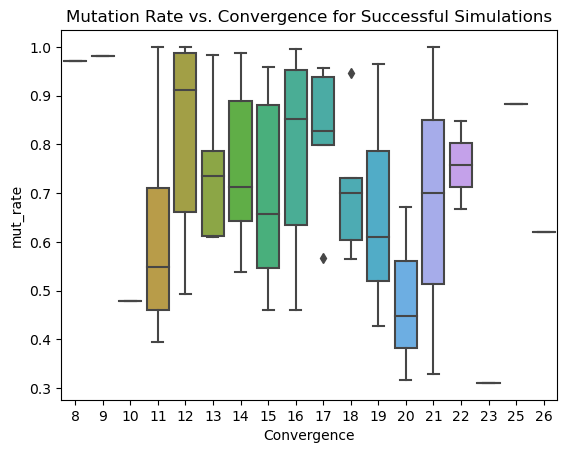

In [109]:
# Look at the distribution of mutation rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='mut_rate', data= successes).set(title='Mutation Rate vs. Convergence for Successful Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Successful Simulations')]

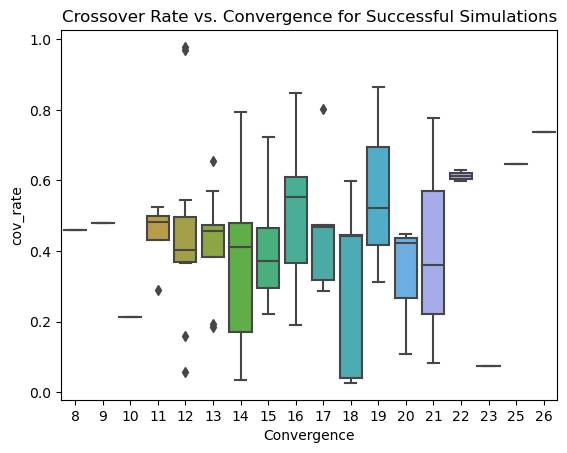

In [91]:
# Look at the distribution of crossover rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='cov_rate', data= successes).set(title='Crossover Rate vs. Convergence for Successful Simulations')

In [92]:
# Group the data by convergence
groups_size = pd.DataFrame(successes.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Successful Simulations by Convergence')]

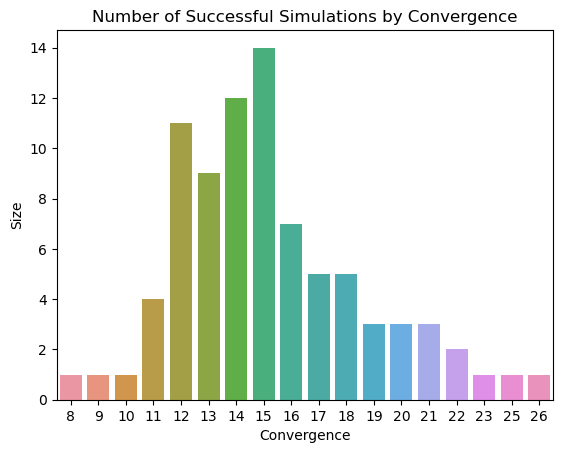

In [93]:
# Count the number of successful simulations by convergence
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Successful Simulations by Convergence')

## Build the same plots for failed simulations

[Text(0.5, 1.0, 'Convergence vs. Fitness for Failed Simulations')]

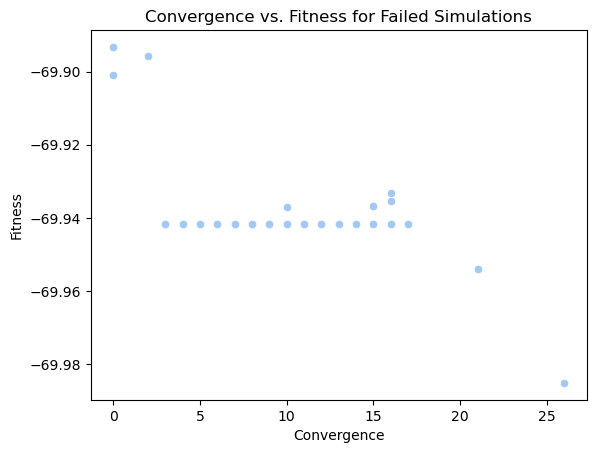

In [94]:
sns.scatterplot(x='Convergence', y='Fitness', data= failures).set(title='Convergence vs. Fitness for Failed Simulations')

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Failed Simulations')]

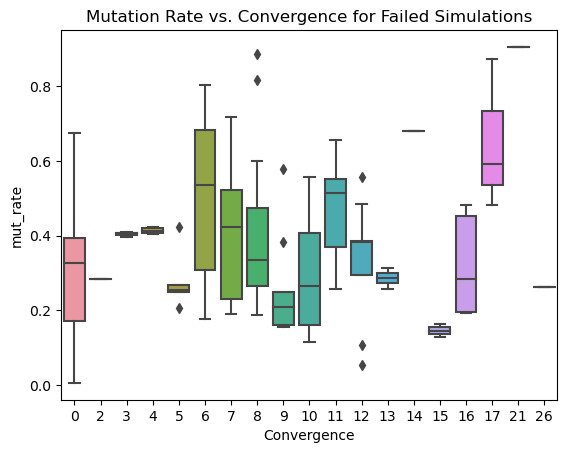

In [95]:
sns.boxplot(x='Convergence', y='mut_rate', data= failures).set(title='Mutation Rate vs. Convergence for Failed Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Failed Simulations')]

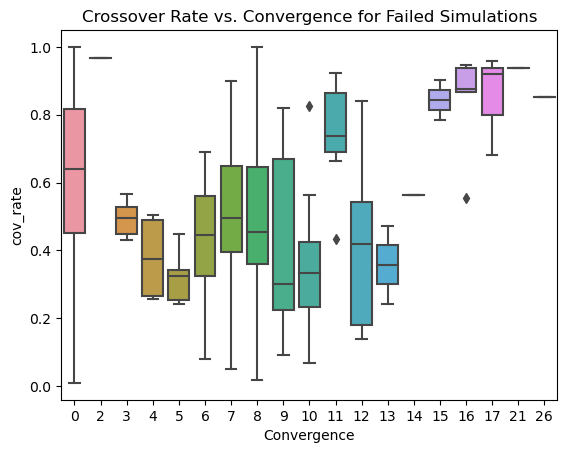

In [96]:
sns.boxplot(x='Convergence', y='cov_rate', data= failures).set(title='Crossover Rate vs. Convergence for Failed Simulations')

In [97]:
groups_size = pd.DataFrame(failures.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Failed Simulations by Convergence')]

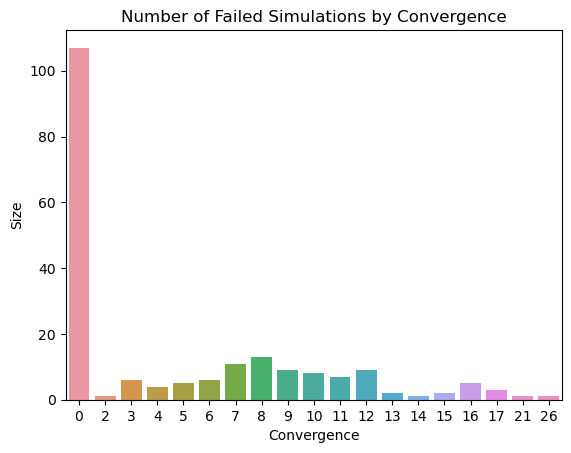

In [98]:
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Failed Simulations by Convergence')